In [1]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
import os

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import emulator

In [2]:
cosmos_test = np.loadtxt("../CMASS/Gaussian_Process/hod_file/cosmology_camb_test_box_full.dat")

All params: ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w', 'M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']

In [3]:
omega_ms = cosmos_test[:,0]
sigma_8s = cosmos_test[:,2]

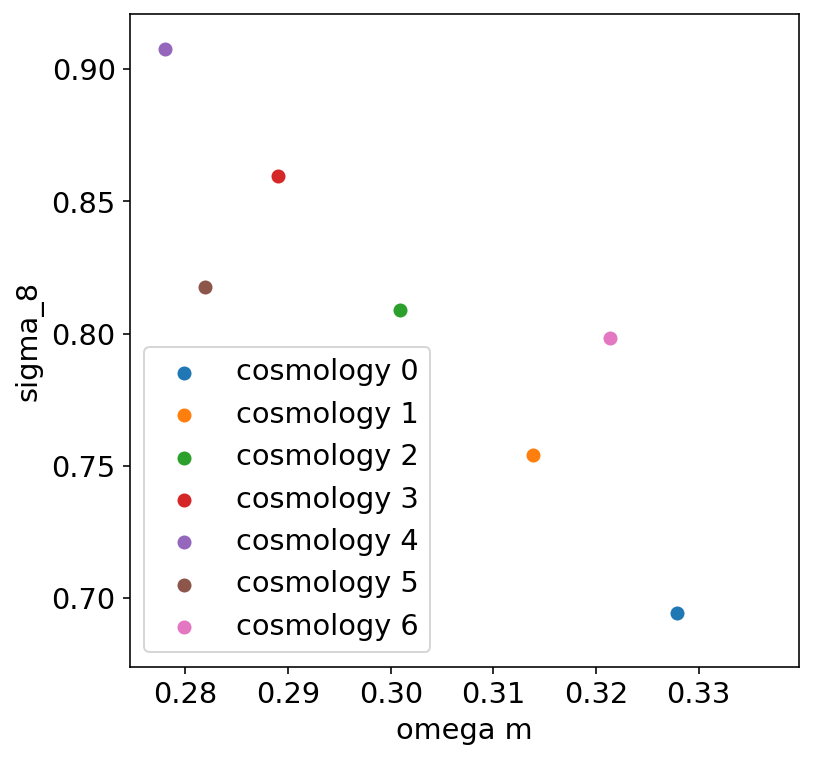

In [4]:
plt.figure(figsize=(6,6))
for i in range(len(omega_ms)):
    plt.scatter(omega_ms[i], sigma_8s[i], label=f"cosmology {i}")
plt.xlabel("omega m")
plt.ylabel("sigma_8")
plt.legend(loc='lower left')

extreme lower right: 0

central: 2

extreme upper left: 4

In [5]:
statistic = 'wp'
testtag = ''
res_dir = '../../clust/results_{}'.format(statistic)
testing_dir = '{}/testing_{}{}/'.format(res_dir, statistic, testtag)
testid = 0

In [6]:
CID_fid = 2
HID_fid = 3
boxid_fid = 0
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, vals_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

In [7]:
errtag = '_hod3_test0'
error = np.loadtxt(f"{res_dir}/{statistic}_error{errtag}.dat")
print(error)

[0.01156016 0.01472741 0.01710767 0.01299131 0.0093331  0.00991669
 0.01256808 0.02101721 0.05011567]


In [8]:
dist_dict = {}
cosmos = range(7)
boxes = range(5)
hods = range(100)
for CID in cosmos:
    for boxid in boxes:
        for HID in hods:
            idtag = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID, boxid, HID, testid)
            rads, vals = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag),
                                                              delimiter=',', unpack=True)

            dist = np.sqrt(np.sum(np.square(vals-vals_fid)/vals_fid)) #distance between each statistic and fiducial
            dist_dict[idtag] = {'cosmo': CID, 'hod': HID, 'box': boxid, 'dist': dist, 'rads': rads, 'vals': vals}

In [9]:
dist_min_c0 = np.inf
dist_min_c4 = np.inf
idt_min_c0 = None
idt_min_c4 = None
for idt in dist_dict:
    dist = dist_dict[idt]['dist']
    cosmo = dist_dict[idt]['cosmo']
    if dist < dist_min_c0 and cosmo == 0:
        dist_min_c0 = dist
        idt_min_c0 = idt
    if dist < dist_min_c4 and cosmo == 4:
        dist_min_c4 = dist
        idt_min_c4 = idt
        
print(dist_dict[idt_min_c0])
print(dist_dict[idt_min_c4])

{'cosmo': 0, 'hod': 37, 'box': 4, 'dist': 2.4070876286468716, 'rads': array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), 'vals': array([2432.515   , 1035.14    ,  441.6304  ,  219.0249  ,  130.2081  ,
         77.79083 ,   42.00617 ,   18.68299 ,    6.224671])}
{'cosmo': 4, 'hod': 42, 'box': 2, 'dist': 3.8126889653163127, 'rads': array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), 'vals': array([2338.292   , 1006.672   ,  437.1772  ,  205.1943  ,  108.3665  ,
         63.69177 ,   35.46365 ,   17.02182 ,    6.114859])}


In [10]:
idtag_min_c0 = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(dist_dict[idt_min_c0]['cosmo'], dist_dict[idt_min_c0]['box'],
                                                    dist_dict[idt_min_c0]['hod'], testid)
idtag_min_c4 = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(dist_dict[idt_min_c4]['cosmo'], dist_dict[idt_min_c4]['box'],
                                                    dist_dict[idt_min_c4]['hod'], testid)

Text(0, 0.5, '$w_p$(r$_p$)')

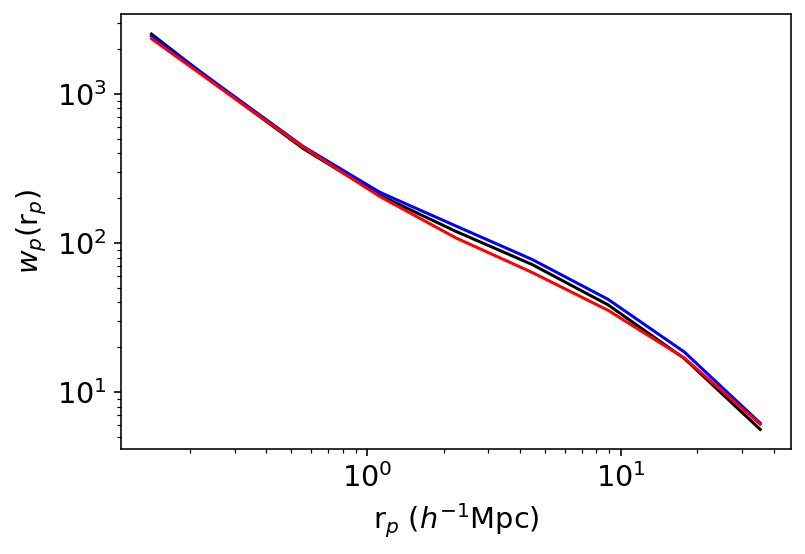

In [11]:
plt.plot(rads, vals_fid, color='k')
plt.plot(dist_dict[idt_min_c0]['rads'], dist_dict[idt_min_c0]['vals'], color='b')
plt.plot(dist_dict[idt_min_c4]['rads'], dist_dict[idt_min_c4]['vals'], color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r$_p$ ($h^{-1}$Mpc)")
plt.ylabel(r"$w_p$(r$_p$)")

In [21]:
stat_str = 'mcf'
err_str = '_hod3_test0'
cov_dir = '../../clust/covariances/'.format(stat_str)

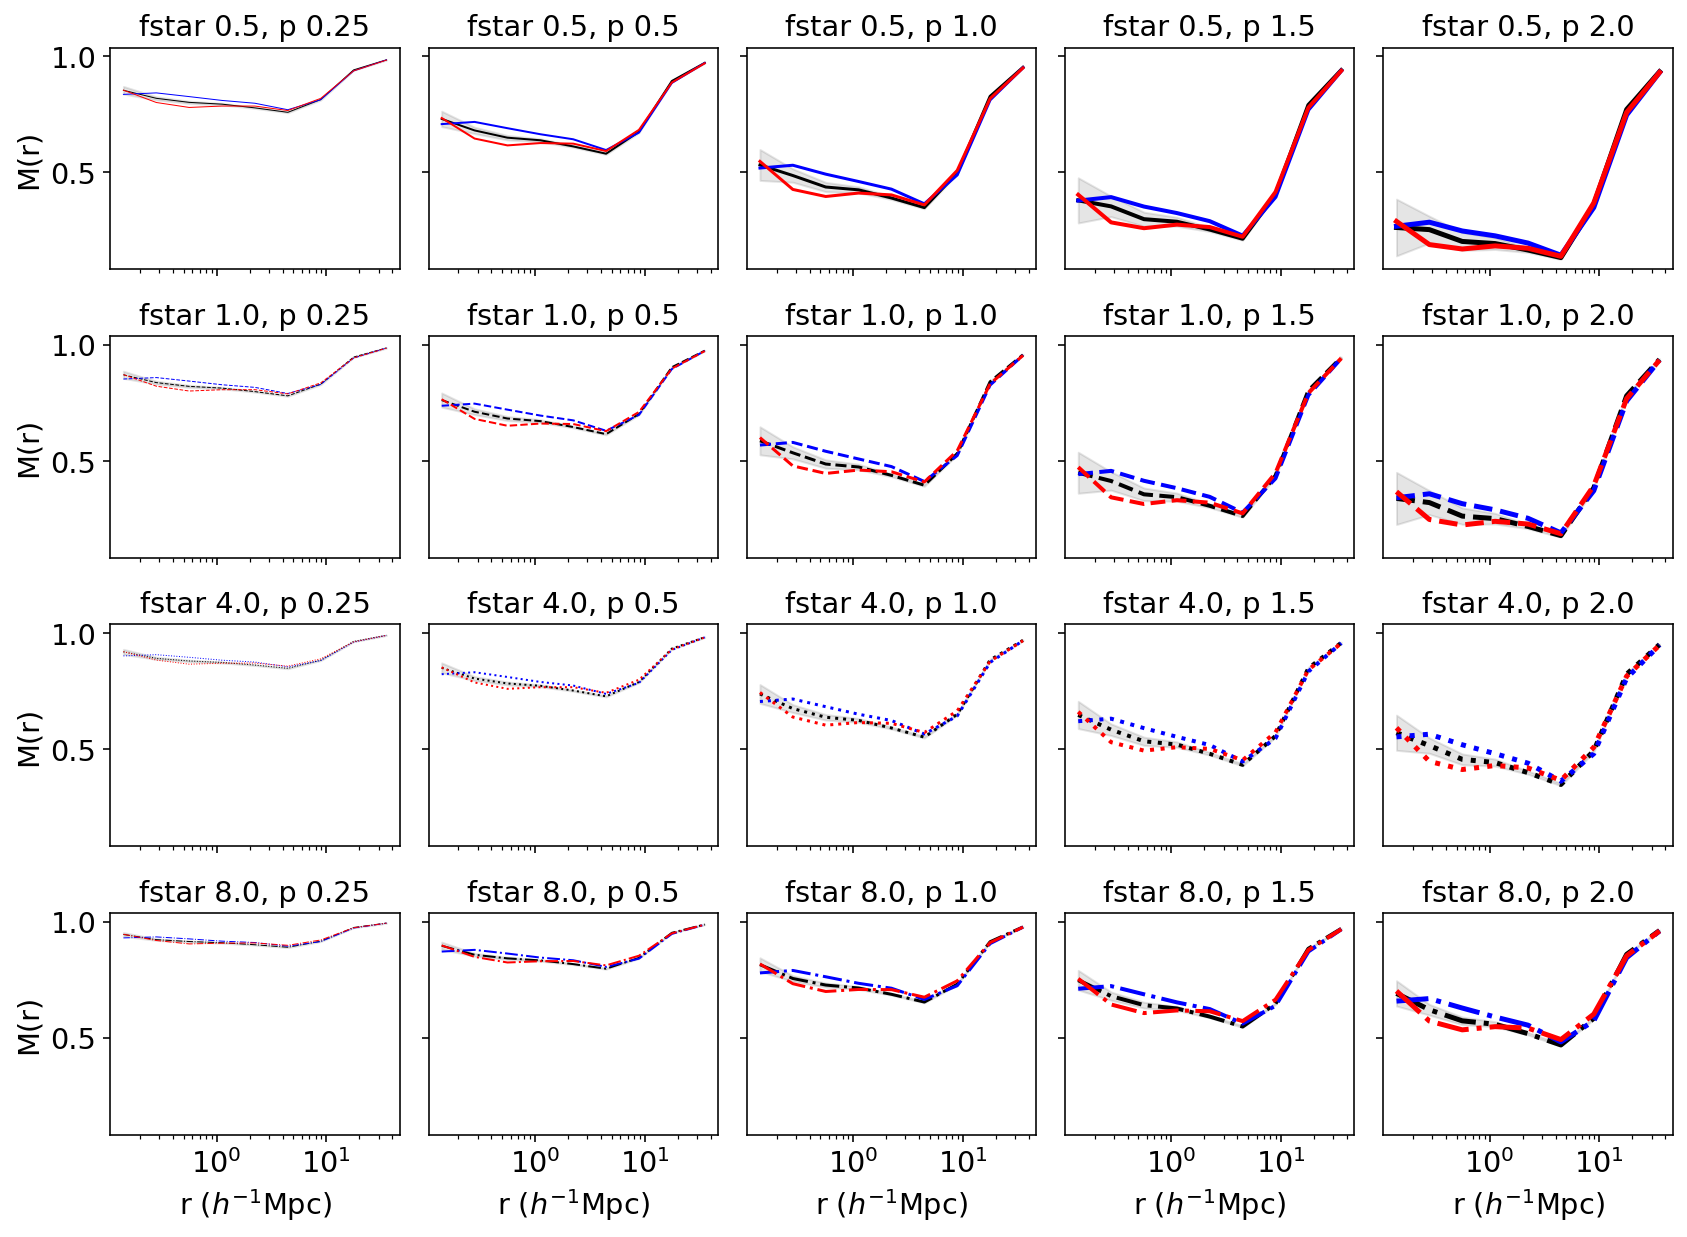

In [22]:
fstars = [0.5, 1.0, 4.0, 8.0]
ps = [0.25, 0.5, 1.0, 1.5, 2.0]

lss = ['-', '--', ':', '-.']
lws = [0.5, 1, 1.5, 2, 2.5]

fig, axarr = plt.subplots(nrows=len(fstars), ncols=len(ps), figsize=(14,10), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.1)
for i, fstar in enumerate(fstars):
    for j, p in enumerate(ps):
        
        if len(fstars)==1 and len(ps)==1:
            ax = axarr
        elif len(fstars)==1:
            ax = axarr[i]
        elif len(ps)==1:
            ax = axarr[j]
        else:
            ax = axarr[i,j]
        testtag = f'_investigate_fstar{fstar}_p{p}'
        res_dir = '../../clust/results_{}/'.format('mcf')
        testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
        rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c0),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c4),
                                                          delimiter=',', unpack=True)
        
        #plt.figure()
        ax.set_title(f"fstar {fstar}, p {p}")
        ax.plot(rads, mcf_fid, color='k', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c0, color='b', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c4, color='r', ls=lss[i], lw=lws[j])
        
        cov_fn = cov_dir+"cov_aemulus_{}{}{}.dat".format(stat_str, err_str, testtag)
        if os.path.exists(cov_fn):
            cov = np.loadtxt(cov_fn)
            std = np.sqrt(np.diag(cov))
            ax.fill_between(rads, (mcf_fid-std), (mcf_fid+std), color='k', alpha=0.1)
        
        
        ax.set_xscale('log')
        
        if i==len(fstars)-1:
            ax.set_xlabel(r"r ($h^{-1}$Mpc)")
        if j==0:
            ax.set_ylabel(r"M(r)")

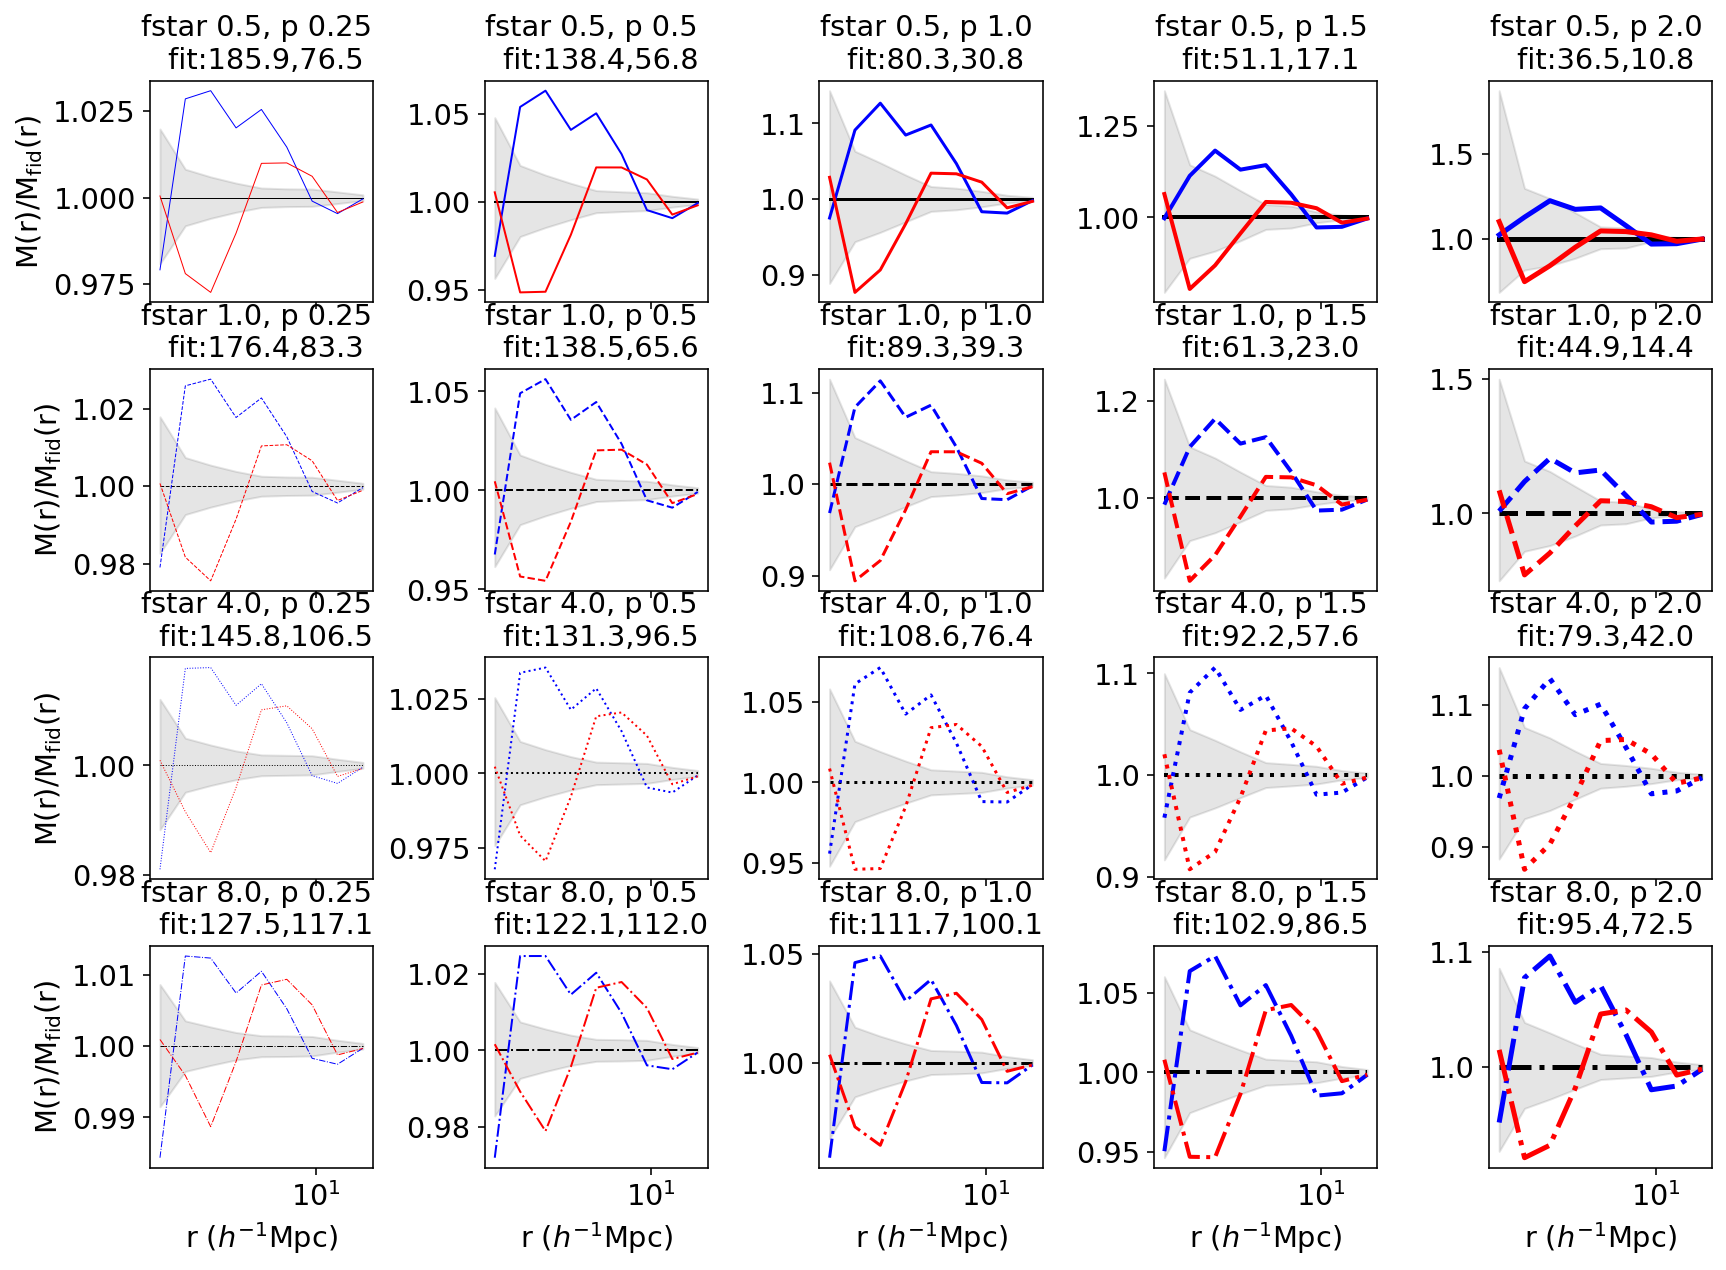

In [25]:
fig, axarr = plt.subplots(nrows=len(fstars), ncols=len(ps), figsize=(14,10), sharex=True)#, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.5)
for i, fstar in enumerate(fstars):
    for j, p in enumerate(ps):
        if len(fstars)==1 and len(ps)==1:
            ax = axarr
        elif len(fstars)==1:
            ax = axarr[i]
        elif len(ps)==1:
            ax = axarr[j]
        else:
            ax = axarr[i,j]        
        testtag = f'_investigate_fstar{fstar}_p{p}'
        res_dir = '../../clust/results_{}/'.format('mcf')
        testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
        rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c0),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c4),
                                                          delimiter=',', unpack=True)

        cov_fn = cov_dir+"cov_aemulus_{}{}{}.dat".format(stat_str, err_str, testtag)
        if os.path.exists(cov_fn):
            cov = np.loadtxt(cov_fn)
            std = np.sqrt(np.diag(cov))
            ax.fill_between(rads, mcf_fid/(mcf_fid-std), mcf_fid/(mcf_fid+std), color='k', alpha=0.1)
            
            err_c0 = np.sum((mcf_min_c0-mcf_fid)**2/(std**2))
            err_c4 = np.sum((mcf_min_c4-mcf_fid)**2/(std**2))
            
        ax.set_title(f'fstar {fstar}, p {p} \n fit:{err_c0:.1f},{err_c4:.1f}')
        ax.plot(rads, mcf_fid/mcf_fid, color='k', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c0/mcf_fid, color='b', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c4/mcf_fid, color='r', ls=lss[i], lw=lws[j])
                    
        ax.set_xscale('log')
        
        if i==len(fstars)-1:
            ax.set_xlabel(r"r ($h^{-1}$Mpc)")
        if j==0:
            ax.set_ylabel(r"M(r)/M$_\mathrm{fid}$(r)")

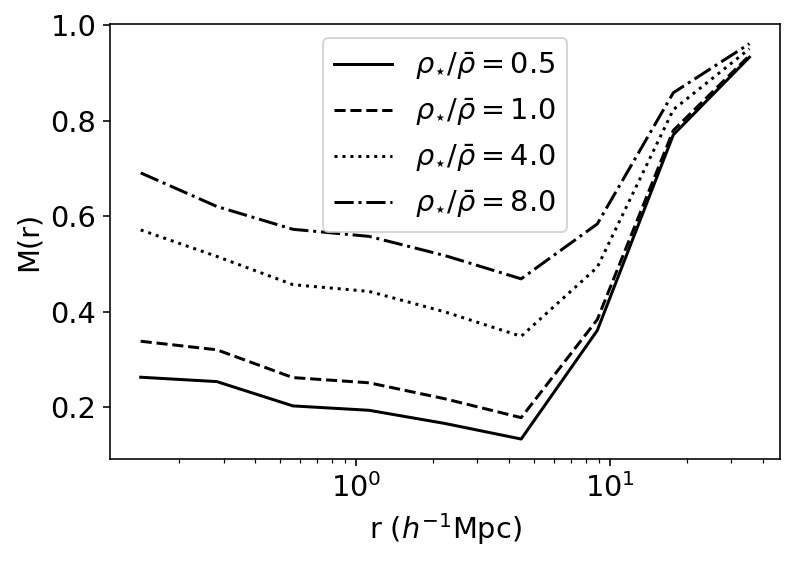

In [26]:
p = 2.0
for i, fstar in enumerate(fstars):
    testtag = f'_investigate_fstar{fstar}_p{p}'
    res_dir = '../../clust/results_{}/'.format('mcf')
    testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
    rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                      delimiter=',', unpack=True)

    plt.plot(rads, mcf_fid, color='k', ls=lss[i], label=r'$\rho_{\star}/\bar{\rho} = $'+str(fstar))

plt.xscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"M(r)")
plt.legend()    

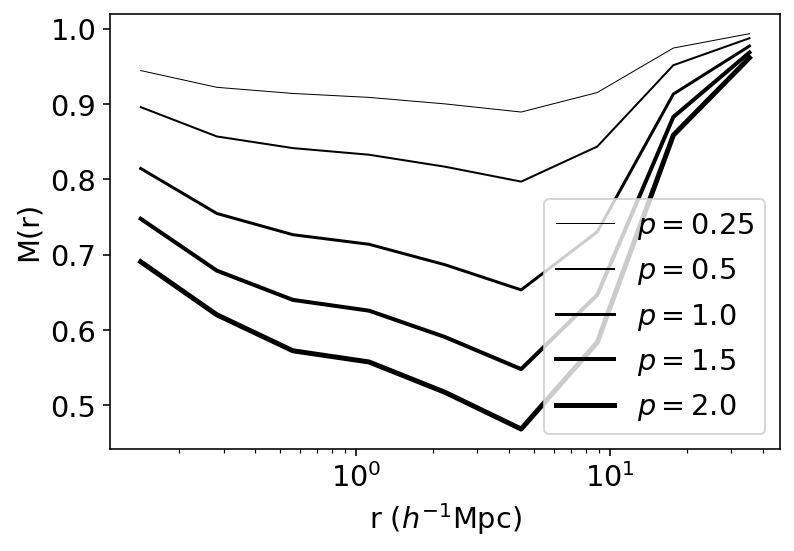

In [27]:
fstar = 8.0
for i, p in enumerate(ps):
    testtag = f'_investigate_fstar{fstar}_p{p}'
    res_dir = '../../clust/results_{}/'.format('mcf')
    testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
    rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                      delimiter=',', unpack=True)

    plt.plot(rads, mcf_fid, color='k', lw=lws[i], label=r'$p = $'+str(p))

plt.xscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"M(r)")
plt.legend()    

In [28]:
#fstar = 1.0
#p = 0.25
fstar = 0.5
p = 1.5
testtag = f'_investigate_fstar{fstar}_p{p}'
testid = 0
CID_fid = 2
HID_fid = 3
boxid_fid = 0

statistic = 'wxi'
res_dir = '../../clust/results_{}'.format(statistic)
testing_dir = '{}/testing_{}{}/'.format(res_dir, statistic, testtag)
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, wxi_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

statistic = 'xi'
res_dir = '../../clust/results_{}'.format(statistic)
testing_dir = '{}/testing_{}{}/'.format(res_dir, statistic, testtag)
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, xi_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

stat = 'mcf'
testtag = f'_investigate_fstar{fstar}_p{p}'
res_dir = '../../clust/results_{}/'.format(stat)
testing_dir = '{}testing_{}{}/'.format(res_dir, stat, testtag)
rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_fid),
     delimiter=',', unpack=True)

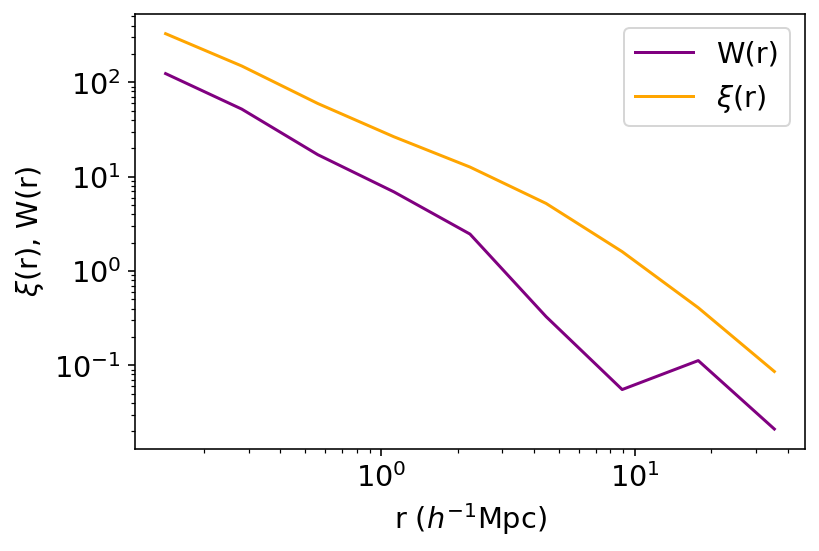

In [29]:
plt.plot(rads, wxi_fid, color='purple', label="W(r)")
plt.plot(rads, xi_fid, color='orange', label=r"$\xi$(r)")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"$\xi$(r), W(r)")
plt.legend()

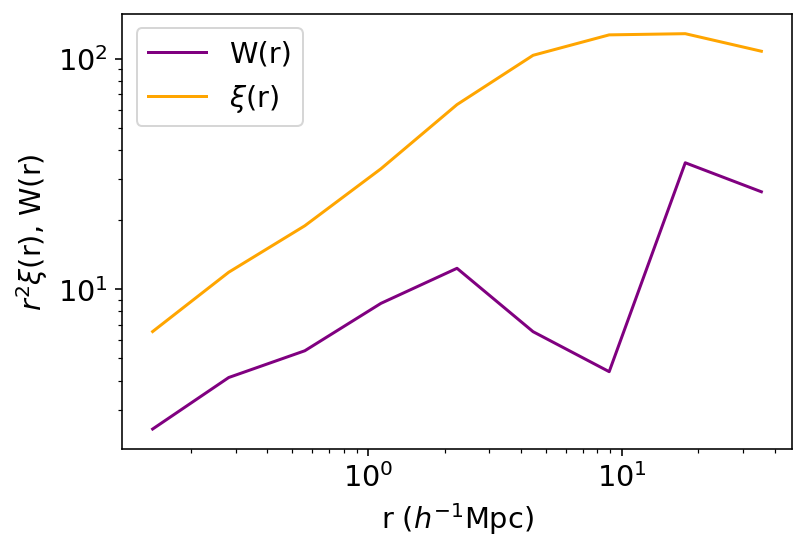

In [30]:
plt.plot(rads, rads**2 * wxi_fid, color='purple', label="W(r)")
plt.plot(rads, rads**2 * xi_fid, color='orange', label=r"$\xi$(r)")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"$r^2 \xi$(r), W(r)")
plt.legend()

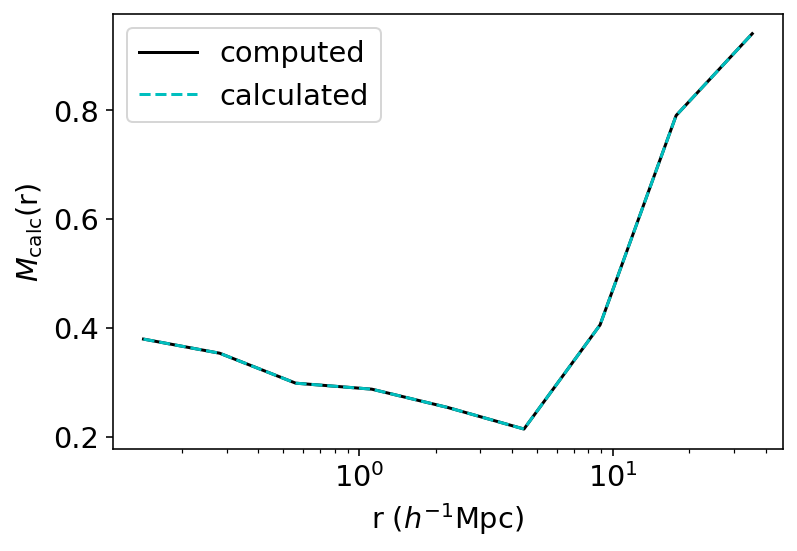

In [31]:
plt.plot(rads, mcf_fid, color='k', label='computed')

mcalc_fid = (1.+wxi_fid)/(1.+xi_fid)
plt.plot(rads, mcalc_fid, color='c', ls='--', label='calculated')

plt.xscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"$M_\mathrm{calc}$(r)")
plt.legend()

Text(0, 0.5, 'UPF')

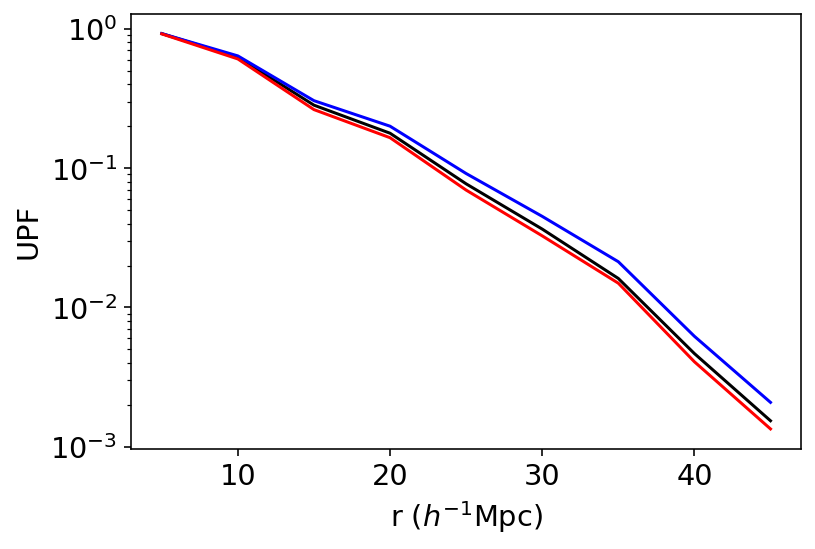

In [32]:
stat = 'upf'

testtag = '' # no mean

plt.figure()
ax = plt.gca()

res_dir = '../../clust/results_{}/'.format(stat)
testing_dir = '{}testing_{}{}/'.format(res_dir, stat, testtag)
rads, stat_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_fid),
                                                  delimiter=',', unpack=True)
rads, stat_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c0),
                                                  delimiter=',', unpack=True)
rads, stat_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c4),
                                                  delimiter=',', unpack=True)

#plt.figure()
ax.plot(rads, stat_fid, color='k')
ax.plot(rads, stat_min_c0, color='b')
ax.plot(rads, stat_min_c4, color='r')
ax.set_yscale('log')

ax.set_xlabel(r"r ($h^{-1}$Mpc)")
ax.set_ylabel(r"UPF")

## Padmahnaban & White 2009

Text(0, 0.5, 'M(r)')

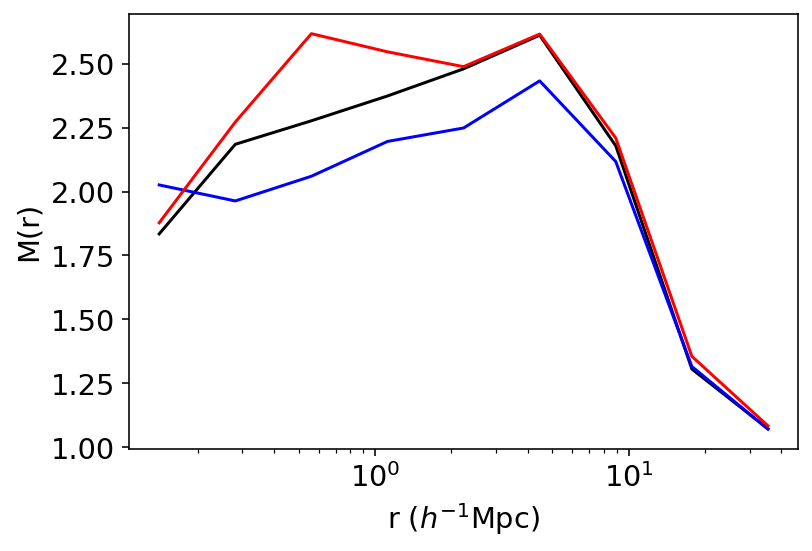

In [33]:
stat = 'mcf'

fstar = 25.0
p = 1.0
testtag = f'_padwhite2009_fstar{fstar}_p{p}'

plt.figure()
ax = plt.gca()

res_dir = '../../clust/results_{}/'.format(stat)
testing_dir = '{}testing_{}{}/'.format(res_dir, stat, testtag)
rads, stat_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_fid),
                                                  delimiter=',', unpack=True)
rads, stat_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c0),
                                                  delimiter=',', unpack=True)
rads, stat_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c4),
                                                  delimiter=',', unpack=True)

#plt.figure()
ax.plot(rads, stat_fid, color='k')
ax.plot(rads, stat_min_c0, color='b')
ax.plot(rads, stat_min_c4, color='r')

ax.set_xscale('log')
ax.set_xlabel(r"r ($h^{-1}$Mpc)")
ax.set_ylabel(r"M(r)")

Text(0, 0.5, 'M(r)')

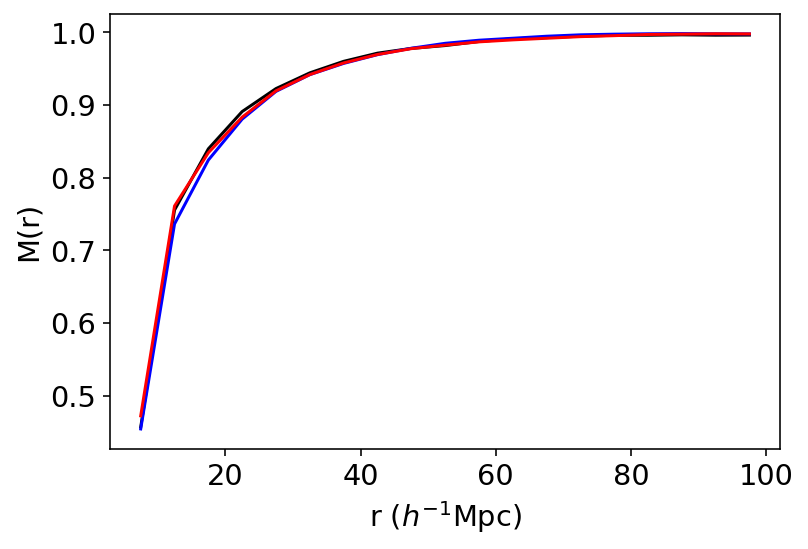

In [34]:
stat = 'mcf'

fstar = 8.0
p = 2.0
testtag = f'_investigatelin_fstar{fstar}_p{p}'

plt.figure()
ax = plt.gca()

res_dir = '../../clust/results_{}/'.format(stat)
testing_dir = '{}testing_{}{}/'.format(res_dir, stat, testtag)
rads, stat_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_fid),
                                                  delimiter=',', unpack=True)
rads, stat_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c0),
                                                  delimiter=',', unpack=True)
rads, stat_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format(stat, idtag_min_c4),
                                                  delimiter=',', unpack=True)

#plt.figure()
ax.plot(rads, stat_fid, color='k')
ax.plot(rads, stat_min_c0, color='b')
ax.plot(rads, stat_min_c4, color='r')

#ax.set_xscale('log')
ax.set_xlabel(r"r ($h^{-1}$Mpc)")
ax.set_ylabel(r"M(r)")